In [4]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df=pd.DataFrame({
    'x1':np.random.normal(0,2,10000),
    'x2':np.random.normal(5,3,10000),
    'x3':np.random.normal(-5,5,10000)
})

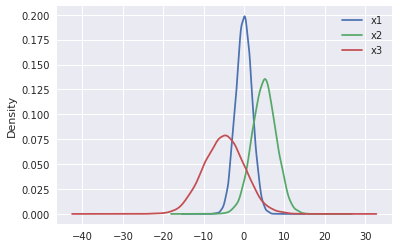

In [8]:
df.plot.kde()

In [14]:
#standard scalar
from sklearn.preprocessing import StandardScaler
standardscalar=StandardScaler()

In [15]:
data_df=standardscalar.fit_transform(df)

In [16]:
df=pd.DataFrame(data_df,columns=['x1','x2','x3'])

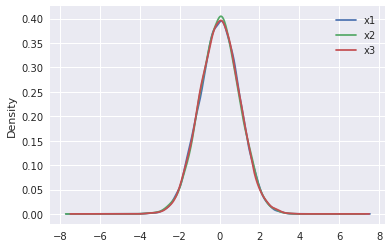

In [17]:
df.plot.kde()

In [18]:
#min max scalar
df=pd.DataFrame({
    'x1':np.random.chisquare(8,1000),
    'x2':np.random.beta(8,2,1000)*40,
    'x3':np.random.normal(50,3,1000)
})

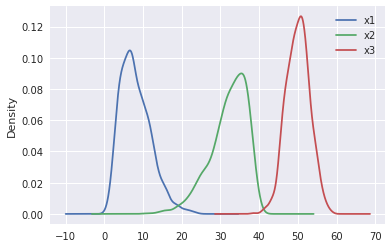

In [20]:
df.plot.kde()

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [22]:
data_df=minmax.fit_transform(df)

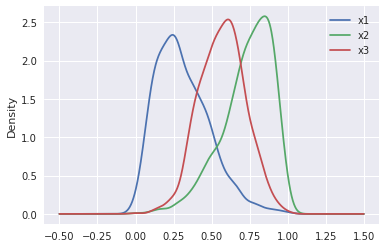

In [23]:
df=pd.DataFrame(data_df,columns=['x1','x2','x3'])
df.plot.kde()

In [24]:
#normalizer


df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})



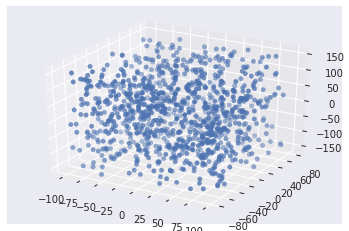

In [27]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(df.x1,df.y1,df.z1)

In [28]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
data_tf=normalizer.fit_transform(df)

In [29]:
df=pd.DataFrame(data_tf,columns=['x1','y1','z1'])

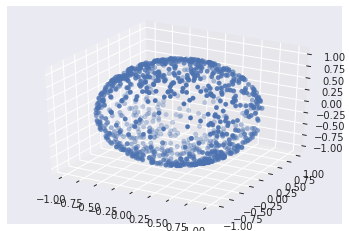

In [31]:
ax=plt.axes(projection='3d')
ax.scatter(df.x1,df.y1,df.z1)

In [32]:
#binarization
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [34]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer()

In [35]:
data_tf=binarizer.fit_transform(X)

In [36]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
#encoding cat values
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})


In [38]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [39]:
df.Income.map({'Low':1,'High':3,'Medium':2})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

In [46]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Male


In [43]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [45]:
le=LabelEncoder()

In [47]:
df['gender_tf']=le.fit_transform(df.Gender)

In [48]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [54]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [55]:


df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})



In [57]:
#imputer
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='mean',axis=1)

In [58]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

In [59]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [60]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2)

In [61]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [62]:
#text processing
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]

In [63]:
df=pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [66]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [67]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [68]:
cv=CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [69]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [70]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'mission': 0, 'food': 1, 'second': 2}

In [72]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

In [73]:
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [74]:
#TFidvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english')

In [75]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [78]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [79]:
#hashing vectorization
from sklearn.feature_extraction.text import HashingVectorizer
hv=HashingVectorizer(n_features=5)

In [80]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

In [85]:
#image processing
from skimage.io import imread,imshow